In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация датасета

sgm - дисперсия гауссова распределения
n - количество точек

In [140]:
sgm=0.5
n=10000
red_dots = numpy.random.multivariate_normal([3, 5, 9], [[sgm,0,0], [0, sgm, 0], [0, 0, sgm]], n)
blue_dots = numpy.random.multivariate_normal([3, 5, 10], [[sgm,0,0], [0, sgm, 0], [0, 0, sgm]], n)
red_dots=numpy.insert(red_dots, 3, 0, axis=1)
blue_dots=numpy.insert(blue_dots, 3, 1, axis=1)
data = numpy.concatenate((red_dots, blue_dots))
numpy.random.shuffle(data)

# sklearn

In [145]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='lbfgs', C=1e-2, tol=1e-10, max_iter=10000)
lr.fit(data[:, 0:3], data[:, 3])
lr.coef_

array([[ -7.10997015e-04,   1.88287139e-03,   1.85006762e+00]])

In [132]:
help(lr)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.feature_selection.from_model._LearntSelectorMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and

# Трёхмерный рисунок

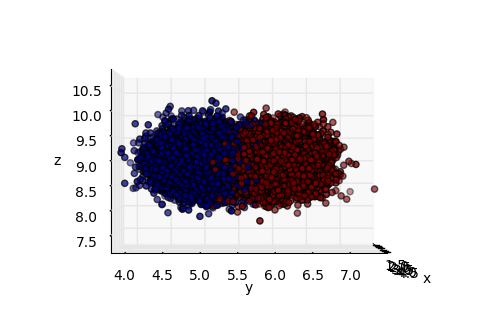

In [128]:
ax=plt.axes(projection='3d')
ax.view_init(0,0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x=data[:, 0]
y=data[:, 1]
z=data[:, 2]
dx=max(x)-min(x)
dy=max(y)-min(y)
dz=max(z)-min(z)
dcommon = max(dx, dy, dz)
mx = (max(x)+min(x))/2
my = (max(y)+min(y))/2
mz = (max(z)+min(z))/2
ax.set_xlim3d((mx-dcommon/2,mx+dcommon/2))
ax.set_ylim3d((my-dcommon/2,my+dcommon/2))
ax.set_zlim3d((mz-dcommon/2,mz+dcommon/2))
ax.scatter(x,y,z, c=data[:, 3])
plt.show()

In [129]:
w1=numpy.array(lr.coef_[0])
w2=numpy.array([1, 0, 0])
w = w1

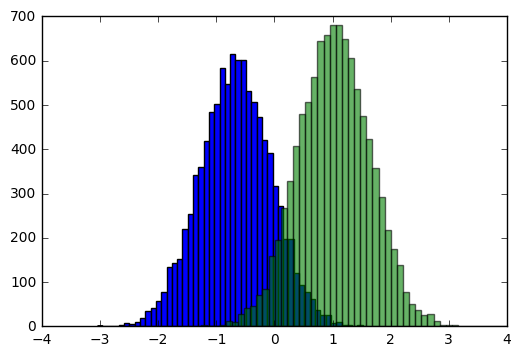

In [130]:
n=data.shape[0]
projections=numpy.zeros((n,2))
projections[:,1]=data[:,3]
for t in range(n):
    projections[t,0] = w.dot(data[t,:3])

def make_proj(data, w):
    pr1=data[:,:3].dot(w)
    return numpy.stack((pr1,data[:,3]), axis=1)

prj=make_proj(data, w)
plt.hist(prj[prj[:, 1]<0.5][:, 0], 50)
plt.hist(prj[prj[:, 1]>0.5][:, 0], 50, alpha=0.6)
plt.show()

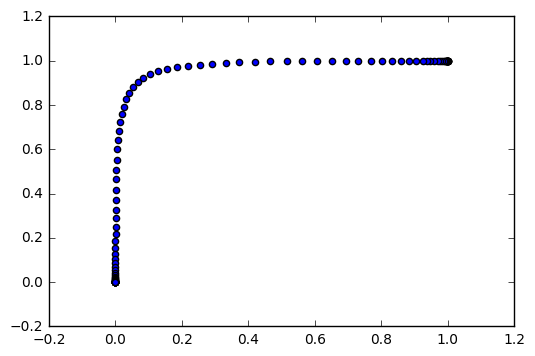

In [131]:
prj=make_proj(data, w)
x=[]
y=[]
for thresh in numpy.linspace(numpy.min(prj[:,0]), numpy.max(prj[:, 0]), 100):
    tp = 0
    fp = 0
    den_less = 0
    den_more = 0
    for t in range(n):
        guess = 0
        if prj[t, 0] > thresh:
            guess = 1
        if guess > 0.5 and prj[t, 1] > 0.5:
            tp += 1
        if guess > 0.5 and prj[t, 1] < 0.5:
            fp += 1
        if prj[t, 1] < 0.5:
            den_less += 1
        else:
            den_more += 1
    if den_more > 0 and den_less > 0:
        current_x = fp / den_less
        current_y = tp / den_more
        x.append(current_x)
        y.append(current_y)
plt.scatter(x,y)